# Logistic Regression

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('teleCust1000t.csv')
print(df)

     region  tenure  age  marital  address  income  ed  employ  retire  \
0         2      13   44        1        9      64   4       5       0   
1         3      11   33        1        7     136   5       5       0   
2         3      68   52        1       24     116   1      29       0   
3         2      33   33        0       12      33   2       0       0   
4         2      23   30        1        9      30   1       2       0   
..      ...     ...  ...      ...      ...     ...  ..     ...     ...   
995       3      10   39        0        0      27   3       0       0   
996       1       7   34        0        2      22   5       5       0   
997       3      67   59        0       40     944   5      33       0   
998       3      70   49        0       18      87   2      22       0   
999       3      50   36        1        7      39   3       3       0   

     gender  reside  custcat  
0         0       2        1  
1         0       6        4  
2         1       

In [2]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [30]:
X = np.asarray(df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'gender', 'reside']])
X[0:5]

array([[  2,  13,  44,   1,   9,  64,   0,   2],
       [  3,  11,  33,   1,   7, 136,   0,   6],
       [  3,  68,  52,   1,  24, 116,   1,   2],
       [  2,  33,  33,   0,  12,  33,   1,   1],
       [  2,  23,  30,   1,   9,  30,   0,   4]], dtype=int64)

In [62]:
df['cust'] = (df['custcat']>1) * 1
y = df['cust'].copy()
y.head()

0    0
1    1
2    1
3    0
4    1
Name: cust, dtype: int32

In [63]:
y = np.asarray(df['cust'].astype('int'))
y[0:5]

array([0, 1, 1, 0, 1])

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, test_size = 0.4, random_state = 100)

In [65]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (600, 8) (600,)
Test set: (400, 8) (400,)


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(max_iter = 500).fit(X_train,y_train)
LR

LogisticRegression(max_iter=500)

In [67]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [68]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,yhat)
cnf_matrix

array([[ 10, 103],
       [ 14, 273]], dtype=int64)

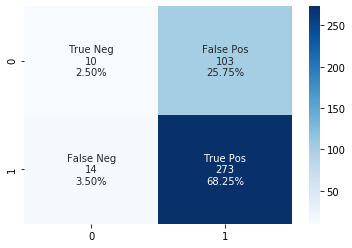

In [70]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix,fmt='', annot=labels,cmap='Blues')

In [73]:
custC= (sum(df['cust'])/len(df['cust'].index))*100
custC

73.4

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale= scaler.fit(X_train)

In [75]:
X_train= scale.transform(X_train)
X_test= scale.transform(X_test)

In [76]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,yhat)

In [77]:
score

0.7075

In [81]:
TP = cnf_matrix[1,1]  
TN = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TP / float(TP+FN)


0.9512195121951219

In [82]:
TN / float(TN+FP)

0.08849557522123894

In [80]:
print(FP/ float(TN+FP))
print (TP / float(TP+FP))
print (TN / float(TN+ FN))

0.911504424778761
0.726063829787234
0.4166666666666667
